# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.002
-0.001
0.0
-0.001
-0.002
0.975
0.977
0.979
0.978
0.978
1.953
1.956
1.958
1.956
1.957
2.938
2.938
2.938
2.938
3.915
3.918
3.92
3.919
3.919
4.91
4.912
4.913
4.913
4.913
5.897
5.899
5.901
5.9
6.41
6.412
6.414
6.414
6.93
6.93
6.93
7.924
7.927
7.93
7.928
7.928
8.921
8.924
8.927
8.927
8.927
9.922
9.924
9.924
9.924
9.927
10.92
10.922
10.925
10.925
10.924
11.918
11.92
11.923
11.922
11.922
12.917
12.919
12.921
12.921
12.921
13.913
13.916
13.918
13.917
14.425
14.429
14.429
14.429
14.945
14.945
14.944
14.945
15.946
15.946
15.946
15.946
16.945
16.945
16.945
16.945
17.947
17.946
17.945
17.946
18.947
18.946
18.946
18.946
19.946
19.946
19.946
19.946
20.936
20.935
20.935
20.935
21.711
21.714
21.715
21.714
21.715
22.495
22.495
22.494
22.494
23.492
23.492
23.491
23.491
24.483
24.483
24.481
24.481
25.479
25.479
25.478
25.477
26.478
26.478
26.477
26.477
27

56.317
56.317
56.317
56.317
56.316
56.316
56.316
56.315
56.314
56.314
56.314
56.314
56.314
56.314
56.314
56.314
56.314
56.314
56.313
56.312
56.312
56.312
56.312
56.312
56.312
56.312
56.312
56.312
56.312
56.312
56.311
56.311
56.311
56.311
56.311
56.349
56.349
56.397
56.442
56.442
56.488
56.488
56.488
56.488
56.488
56.52
56.52
56.522
56.529
56.52
56.524
56.525
56.522
56.521
56.523
56.523
56.522
56.521
56.521
56.521
56.521
56.521
56.521
56.521
56.521
56.52
56.52
56.52
56.52
56.52
56.52
56.52
56.52
56.52
56.519
56.519
56.518
56.518
56.518
56.518
56.518
56.518
56.518
56.518
56.519
56.519
56.519
56.518
56.517
56.517
56.517
56.516
56.557
56.598
56.638
56.638
56.679
56.718
56.718
56.718
56.718
56.718
56.718
56.718
56.718
56.717
56.717
56.717
56.717
56.717
56.717
56.717
56.716
56.715
56.717
56.717
56.716
56.716
56.716
56.715
56.714
56.714
56.714
56.714
56.714
56.714
56.714
56.714
56.714
56.713
56.713
56.713
56.713
56.712
56.712
56.712
56.712
56.712
56.712
56.712
56.712
56.712
56.712
56.712
56.7

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1519,3038,59.304
1520,3040,59.304
1521,3042,59.304
1522,3044,59.305


<IPython.core.display.Javascript object>


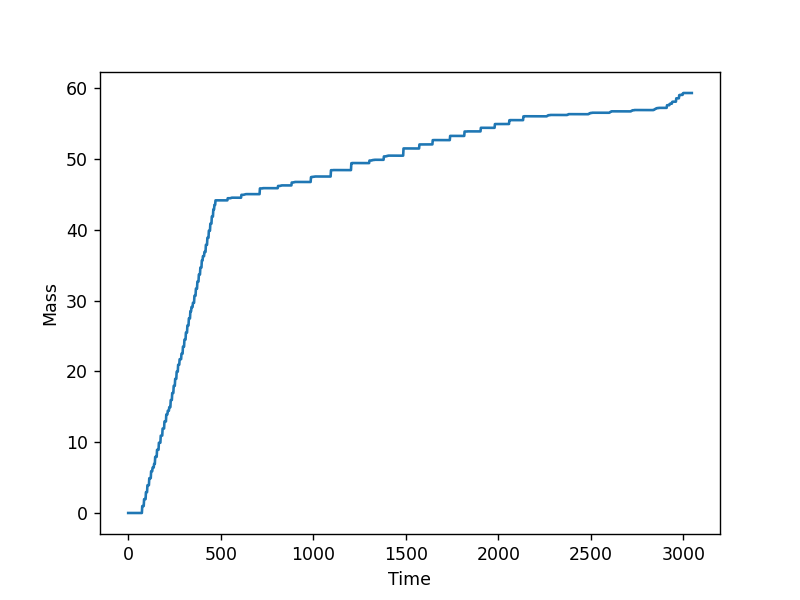

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_150823_S769-774.csv')